<a href="https://colab.research.google.com/github/neel0086/deep_learning/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
%matplotlib inline

In [6]:



uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['customer_churn.csv']))
df.drop('customerID',axis='columns',inplace=True)
df = pd.DataFrame(df)

df.dtypes

Saving customer_churn.csv to customer_churn.csv


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# REMOVING NOISE FROM THE DATA #
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
# Change to numeric data for Total Charges
df1 = df1.copy()
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

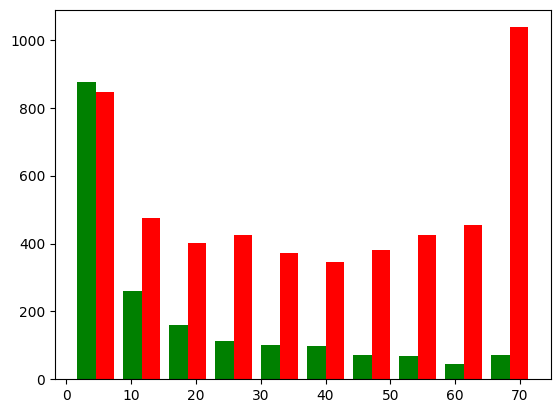

In [14]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])